# CE-40957: Reinforcement Learning
## HW1

*Full name: Milad Heidari*

*Student number: 98101469* 

In this notebook, you will learn about reinforcement learning and its implementation in OpenAI Gym environments. 


This notebook is intended to provide hands-on experience with implementing reinforcement learning algorithms and evaluating their performance. By working through the code and examples, you will gain a deeper understanding of how Q-learning and monte carlo method works and how it can be applied to real-world problems.

# 1. Q-learning

In [1]:
!pip install gym[toy_text]
import gym
import numpy as np
from tqdm import trange
from tqdm.notebook import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
import os
import time
os.environ["SDL_VIDEODRIVER"] = "dummy"
clear_output()

## Gym OpenAI Environments
`gym` is a library developed by OpenAI that provides a suite of environments for developing and comparing reinforcement learning algorithms. Each environment has a well-defined observation space and action space, as well as a reset function that returns the environment to its initial state.

The main steps involved in training an agent in a `gym` environment are:

1. Initialize the environment
2. Reset the environment to its initial state
3. Take an action in the current state
4. Observe the new state and reward
5. Update the agent's policy based on the observed reward and new state
6. Repeat steps 3 to 5 until the environment returns a "done" signal

Once the agent has learned a good policy, it can be evaluated by running it in the environment for several episodes and measuring its average reward.

### FrozenLake environment
The `FrozenLake-v1` environment is a variant of the classic reinforcement learning problem where the agent must navigate a grid while avoiding obstacles. 

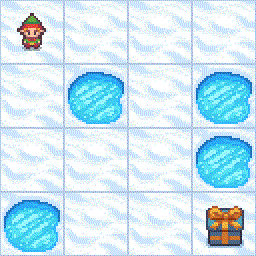


* **Observation Space:** The observation space of the environment is a grid representing the state of the lake.
* **Action Space:** The agent has four possible actions at each time step: move up, move down, move left, or move right.
* **Goal:** The goal of the agent is to reach the goal state while avoiding holes in the ice.
* **Reward:** Reach goal(G): +1 , Reach hole(H): 0 , Reach frozen(F): 0
* **Episode Termination:** The environment signals the end of an episode with a "done" signal.


In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode='rgb_array', is_slippery=False)
spec = gym.spec('FrozenLake-v1')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7



In [3]:
Actions =  {0: 'LEFT', 
            1: 'DOWN',
            2: 'RIGHT',
            3: 'UP'}

LEFT --> RIGHT --> LEFT


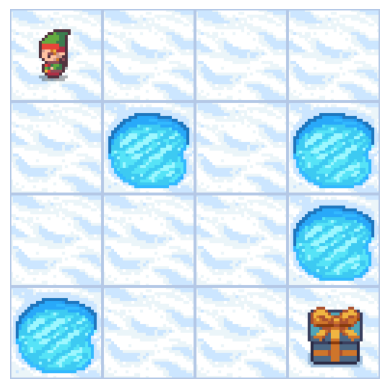

In [4]:
# Be free to test!
# take random actions, and see how the agent moves

env.reset()

action_seq= []

for i in range(3):
    action_number = env.action_space.sample()
    action_seq.append(Actions[action_number])
    env.step(action_number)

print(' --> '.join(action_seq))
env_screen = env.render()
plt.imshow(env_screen)
plt.axis('off');

In [5]:
# Utils
def epsilon_greedy(Q, s, epsilon):
    rand_num = np.random.rand()
    
    if rand_num < epsilon:
        return np.random.choice(range(Q.shape[1]))
    else:
        return np.argmax(Q[s, :])

## Q-Learning
Q-Learning is a model-free reinforcement learning algorithm that is used to find the optimal policy for an agent in an environment. It is based on the idea of updating an estimate of the optimal action-value function using the Bellman equation. The optimal action-value function is defined as the maximum expected reward that an agent can receive by taking an action a in a state s and following the optimal policy thereafter.

The action-value function Q(s,a) is updated iteratively as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

where ‍‍‍‍‍`r` is the reward received after taking action a in state `s`, `s'` is the new state, $\gamma$ is the discount factor (a value between 0 and 1 that determines the importance of future rewards), and $\alpha$ is the learning rate (determines the step size at which the value function is updated).

In [6]:
def q_learning(env, num_episodes, alpha, gamma, epsilon, interval=100):
    # Initialize the action-value function Q(s,a)
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    avg_rewards = []
    avg_episode_length = []
    success_rate = []
    
    agg_rewards = []
    successes = []
    episode_lengths = []
    
    # Loop over each episode
    for episode in tqdm(range(num_episodes)):

        state, _ = env.reset()

        # ==================================== Your Code (Begin) ====================================
        done = False
        G = 0
        n = 0
        while not done:
            action = epsilon_greedy(Q, state, epsilon)
            new_state, reward, done, _, _ = env.step(action)
            G += gamma**n * reward
            n += 1
            Q[state, action] = Q[state, action] + \
            alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])
            state = new_state
        
        # If reward is 1, episode was successful
        if reward == 1:
            successes.append(1)
        else:
            successes.append(0)
            
        episode_lengths.append(n)
        
        agg_rewards.append(G)
        
        if episode % interval == 0:
            
            avg_rewards.append((episode, np.mean(agg_rewards)))
            agg_rewards.clear()
            
            avg_episode_length.append((episode, np.mean(episode_lengths)))
            episode_lengths.clear()
            
            success_rate.append((episode, np.mean(successes)))
            successes.clear()
            
        # ==================================== Your Code (End) ====================================
    # Return the learned action-value function
    return Q, avg_rewards, avg_episode_length, success_rate

In [7]:
# change the parameters if needed
num_episodes = 100000
alpha = 0.85
gamma = 0.95
epsilon = 0.25
interval = 1000

In [8]:
# training
Q_q, avg_rewards_q, avg_episode_length_q, success_rate_q = \
q_learning(env, num_episodes, alpha, gamma, epsilon, interval)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [9]:
Q_q

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [10]:
# testing an episode
action_seq= []
state, _ = env.reset()
done = False
image_frames = []
image_frames.append(env.render())
while not done:
    action = np.argmax(Q_q[state, :])
    action_seq.append(Actions[action])
    new_state, reward, done, _, _ = env.step(action)
    state = new_state
    image_frames.append(env.render())
    if done:
        if reward == 1:
            print("Successful episode!")
        else:
            print("Failed episode")

Successful episode!


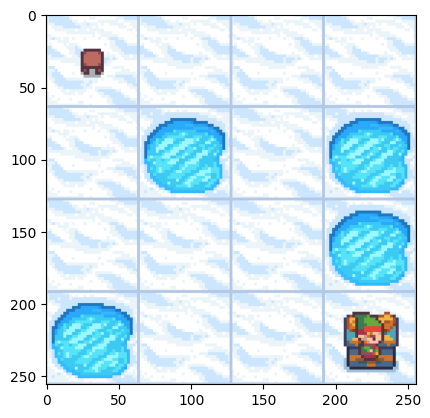

In [11]:
fig, ax = plt.subplots()
ims = [[ax.imshow(img)] for img in image_frames]
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
mywriter = animation.FFMpegWriter(fps=1)
ani.save('Qlearning.gif', writer=mywriter)

In [12]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.
print(' --> '.join(action_seq))

DOWN --> DOWN --> RIGHT --> DOWN --> RIGHT --> RIGHT


![Q learning GIF sample episode](Qlearning.gif)

## SARSA
SARSA (State-Action-Reward-State-Action) is a popular reinforcement learning algorithm used for finding an optimal policy in an environment. Like Q-learning, SARSA is an off-policy algorithm that updates the values of the Q-table based on the observed rewards and next state-action pairs.

The key difference between SARSA and Q-learning is in the selection of the next action. In SARSA, the next action is selected based on the current policy, whereas in Q-learning, the next action is selected based on the greedy policy. This means that in SARSA, the algorithm is learning about the expected returns from the current policy, whereas in Q-learning, the algorithm is learning about the optimal policy.

Mathematically, the SARSA update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.


In [13]:
def sarsa(env, num_episodes, alpha, gamma, epsilon, epsilon_decay, final_epsilon, interval=100):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    avg_rewards = []
    avg_episode_length = []
    success_rate = []
    
    agg_rewards = []
    successes = []
    episode_lengths = []
    
    for episode in tqdm(range(num_episodes)):
        state, _ = env.reset()
        # ==================================== Your Code (Begin) ====================================
        action = epsilon_greedy(Q, state, epsilon)
        done = False
        G = 0
        n = 0
        while not done:
            next_state, reward, done, _, _ = env.step(action)
            next_action = epsilon_greedy(Q, next_state, epsilon)
            G += gamma**n * reward
            n += 1
            Q[state, action] = Q[state, action] + \
            alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            state, action = next_state, next_action
            
        epsilon = max(epsilon * epsilon_decay, final_epsilon)
        
        # If reward is 1, episode was successful
        if reward == 1:
            successes.append(1)
        else:
            successes.append(0)
            
        episode_lengths.append(n)
        
        agg_rewards.append(G)
        
        if episode % interval == 0:
            
            avg_rewards.append((episode, np.mean(agg_rewards)))
            agg_rewards.clear()
            
            avg_episode_length.append((episode, np.mean(episode_lengths)))
            episode_lengths.clear()
            
            success_rate.append((episode, np.mean(successes)))
            successes.clear()
        # ==================================== Your Code (End) ====================================
        
    return Q, avg_rewards, avg_episode_length, success_rate

In [14]:
# change the parameters if needed
num_episodes = 100000
alpha = 0.4
gamma = 0.95
epsilon = 0.9
epsilon_decay = 1 - 1e-4
final_epsilon = 0.01
interval = 1000

In [15]:
# training
Q_sarsa, avg_rewards_sarsa, avg_episode_length_sarsa, success_rate_sarsa = \
sarsa(env, num_episodes, alpha, gamma, epsilon, epsilon_decay, final_epsilon, interval)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [16]:
Q_sarsa

array([[0.65935615, 0.64373608, 0.75826524, 0.61235902],
       [0.60030825, 0.        , 0.81042317, 0.64286682],
       [0.54370925, 0.85735843, 0.48132332, 0.61763622],
       [0.48057516, 0.        , 0.29199837, 0.29557474],
       [0.59192308, 0.80862612, 0.        , 0.53730858],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.90249869, 0.        , 0.53493435],
       [0.        , 0.        , 0.        , 0.        ],
       [0.5085655 , 0.        , 0.857375  , 0.5052859 ],
       [0.59026171, 0.9025    , 0.53413898, 0.        ],
       [0.84940287, 0.95      , 0.        , 0.79609845],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.89065229, 0.95      , 0.80256497],
       [0.88910863, 0.95      , 1.        , 0.88268755],
       [0.        , 0.        , 0.        , 0.        ]])

In [17]:
# testing an episode
action_seq= []
state, _ = env.reset()
done = False
image_frames = []
image_frames.append(env.render())
while not done:
    action = np.argmax(Q_sarsa[state, :])
    action_seq.append(Actions[action])
    new_state, reward, done, _, _ = env.step(action)
    state = new_state
    image_frames.append(env.render())
    if done:
        if reward == 1:
            print("Successful episode!")
        else:
            print("Failed episode")

Successful episode!


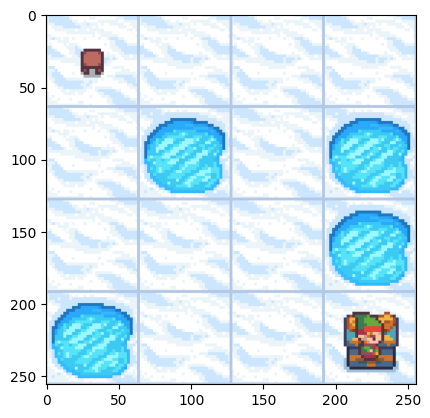

In [18]:
fig, ax = plt.subplots()
ims = [[ax.imshow(img)] for img in image_frames]
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=2000)
mywriter = animation.FFMpegWriter(fps=1)
ani.save('SARSA.gif', writer=mywriter)

In [19]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.
print(' --> '.join(action_seq))

RIGHT --> RIGHT --> DOWN --> DOWN --> DOWN --> RIGHT


![Q learning GIF sample episode](SARSA.gif)

## Conclution
Compare these 2 methods based on average return, penalty, episode length and success rate.
In the previous cells, if necessary, store the necessary variables for this comparison and use them in the following block.

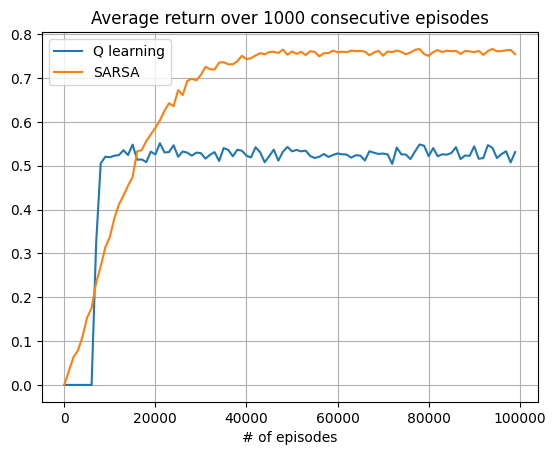

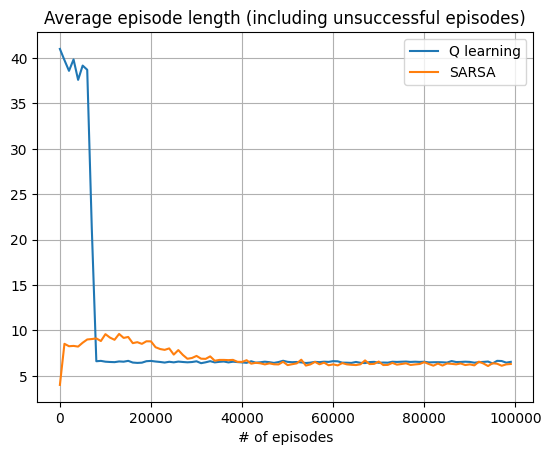

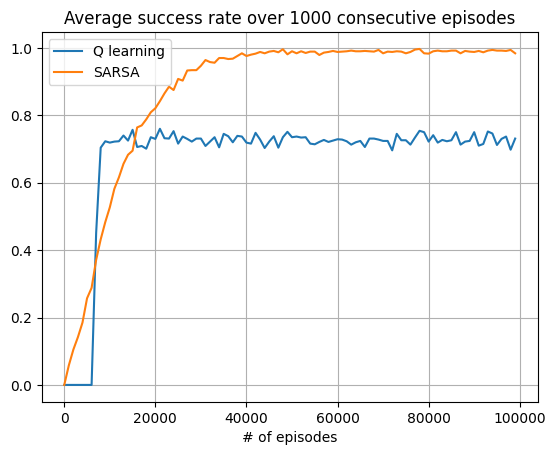

In [20]:
fig1, ax1 = plt.subplots()
ax1.plot([x[0] for x in avg_rewards_q], [x[1] for x in avg_rewards_q], label='Q learning')
ax1.plot([x[0] for x in avg_rewards_sarsa], [x[1] for x in avg_rewards_sarsa], label='SARSA')
ax1.set_xlabel('# of episodes')
ax1.set_title('Average return over 1000 consecutive episodes')
plt.grid()
plt.legend();

fig2, ax2 = plt.subplots()
ax2.plot([x[0] for x in avg_episode_length_q], [x[1] for x in avg_episode_length_q], label='Q learning')
ax2.plot([x[0] for x in avg_episode_length_sarsa], [x[1] for x in avg_episode_length_sarsa], label='SARSA')
ax2.set_xlabel('# of episodes')
ax2.set_title('Average episode length (including unsuccessful episodes)')
plt.grid()
plt.legend()

fig3, ax3 = plt.subplots()
ax3.plot([x[0] for x in success_rate_q], [x[1] for x in success_rate_q], label='Q learning')
ax3.plot([x[0] for x in success_rate_sarsa], [x[1] for x in success_rate_sarsa], label='SARSA')
ax3.set_xlabel('# of episodes')
ax3.set_title('Average success rate over 1000 consecutive episodes')
plt.grid()
plt.legend();

In [21]:
print('Q table of Q-learning: ')
print(Q_q)
print()
print('Q table of SARSA: ')
print(Q_sarsa)

Q table of Q-learning: 
[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.77378094 0.77378094]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]

Q table of SARSA: 
[[0.65935615 0.64373608 0.75826524 0.61235902]
 [0.60030825 0.         0.81042317 0.64286682]
 [0.54370925 0.85735843 0.48132332 0.61763622]
 [0.48057516 0.         0.29199837 0.29557474]
 [0.59192308 0.

According to the figures above and Q tables, both algorithms are able to find an optimal path (there are multiple optimal paths to the goal), but as the Q tables suggest, since Q learning uses exploratory behaviour policy, it accurately determines action-values of every state-action pairs. In contrast, SARSA is an on-policy algorithm and for SARSA, the behaviour and target policies are the same, so using an $\epsilon$-greedy policy is inevitable. Here we are using $\epsilon$-greedy policy. The $\epsilon$ starts at $0.9$ and in every episode its multiplied by $0.9999$, ending at $0.01$. It's important to notice that the average reward for the Q-learning is smaller than of SARSA because here we are comparing behaviour policies and behaviour policy of Q-learning is choosen to be an $\epsilon$-greedy with respect to its Q table.

<br><br><br><br><br><br><br><br><br><br><br><br>

# 2. Monte Carlo method

In this notebook, you will learn about the Monte Carlo method in the context of reinforcement learning.
Your agent will move in the following picture. This is a random walk with two possible actions (`LEFT` and `RIGHT`).
The agent gets a reward of 1 if it reaches the right-most state, and 0 otherwise. You are going to use such an environment with 31 states.

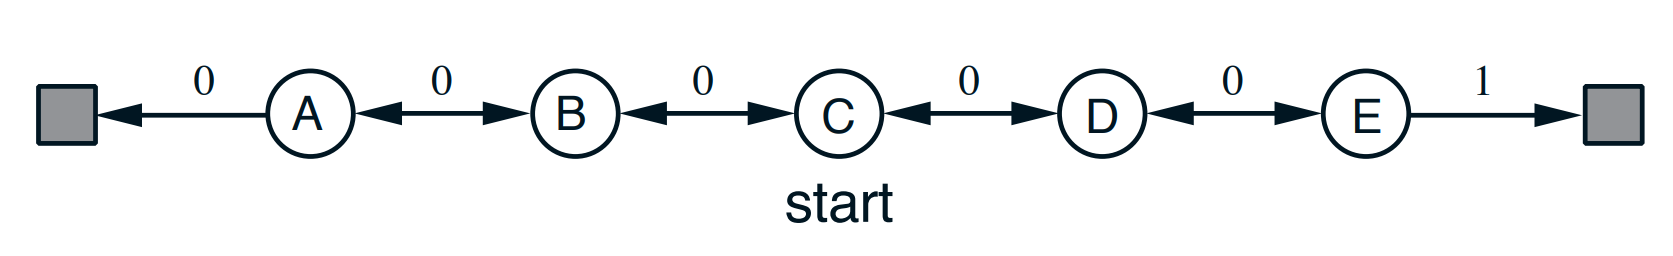

In [22]:
class RandomWalkEnv():
    def __init__(self, num_states=31, start=15, gamma=1):
        self.num_states = num_states
        self.start = start
        self.end = num_states - 1
        self.gamma = gamma
        self.state = None
        self.actions = ['LEFT', 'RIGHT']

    def reset(self):
        self.state = self.start
        return self.state, 0, False

    def step(self, action):
        if self.state == self.end or self.state == 0:
            return self.state, 0, True
        action_direction = 0
        if action == 'RIGHT':
            action_direction = 1
        elif action == 'LEFT':
            action_direction = -1

        self.state += action_direction
        reward, done = 0, False
        if self.state == self.end:
            reward, done = 1, True
        elif self.state == 0:
            done = True
        return self.state, reward, done

    def get_true_values(self):
        values = [0] * self.num_states
  
        values[self.end - 1] = 1
        for i in range(self.end - 1, 1, -1):
            values[i - 1] = self.gamma * values[i]
        
        return values

The Monte Carlo method is a reinforcement learning technique for estimating the value function of a Markov decision process (MDP). It involves generating multiple episodes by following a given policy and computing the returns (sum of rewards) for each state-action pair. The value of a state-action pair is then estimated as the average of the returns obtained from that pair over multiple episodes.

The formula for updating the value function using the Monte Carlo method is:

\begin{equation}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \frac{1}{N(S_t,A_t)} \sum_{i=1}^{N(S_t,A_t)}(G_i - Q(S_t,A_t))
\end{equation}

where $Q(S_t,A_t)$ is the estimated value of the state-action pair $(S_t,A_t)$, $N(S_t,A_t)$ is the number of times the state-action pair has been visited, $G_i$ is the return obtained from the $i$th visit to the state-action pair, and the sum is taken over all $N(S_t,A_t)$ visits.

To implement the Monte Carlo method, you need to define the environment, the policy, and the number of episodes to simulate. At each step of the episode, you observe the state, take an action according to the policy, and observe the reward and the next state. You then update the value function using the formula above. As more episodes are generated, the value estimates become more accurate.

In [113]:
def MC(env, num_episodes, alpha=0.1):
    # ==================================== Your Code (Begin) ====================================
    Q = np.zeros((env.num_states, len(env.actions)))
    epsilon = 1
    errors = []
    
    for k in range(1, num_episodes+1):
        data = []
        state, _, _ = env.reset()
        data.append(state)
        done = False
        step = 0
        while not done:
            step += 1
            action = epsilon_greedy(Q, state, epsilon/k)
            state, reward, done = env.step('RIGHT' if action == 0 else 'LEFT')
            if done:
                data.extend([action, reward])
            else:
                data.extend([action, reward, state])
                

        G = 0
        while data:
            reward = data.pop()
            action = data.pop()
            state = data.pop()
            G = env.gamma * G + reward
            Q[state, action] = Q[state, action] + alpha * (G - Q[state, action])
            
        errors.append(
            np.sqrt(np.mean((Q.max(axis=1) - env.get_true_values())**2))
        )
    
    values = Q.max(axis=1)
    # ==================================== Your Code (End) ====================================
    return values, errors

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

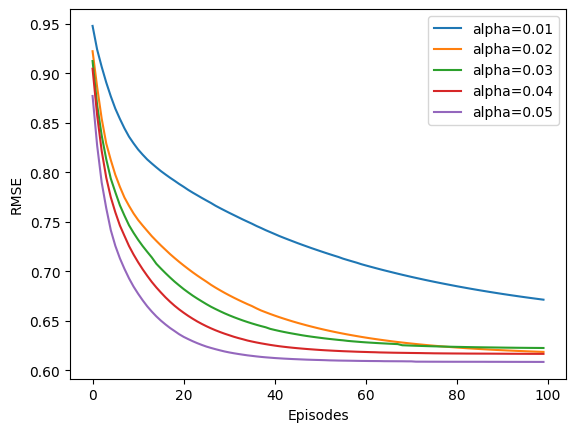

In [114]:
# Visualization

import matplotlib.pyplot as plt

env = RandomWalkEnv()
num_episodes = 100
alphas = [0.01, 0.02, 0.03, 0.04, 0.05]
num_runs = 100

for alpha in alphas:
    rmse_avg = np.zeros(num_episodes)
    for run in tqdm(range(num_runs)):
        values, errors = MC(env, num_episodes, alpha)
        rmse_avg += np.array(errors)
    rmse_avg /= num_runs
    plt.plot(range(num_episodes), rmse_avg, label=f'alpha={alpha}')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.show()

# Any visualization for better intuition would be appreciated.